<a href="https://colab.research.google.com/github/UpendraThota/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

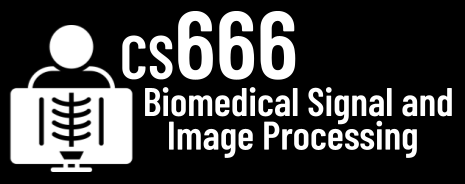

# Assignment 1

In [41]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [42]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [43]:
import biosppy
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [44]:
SAMPLING_RATE = 1000 
SECONDS = 12

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [45]:
result =biosppy.signals.ecg.ecg(signal=signal, sampling_rate=1000.0, show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

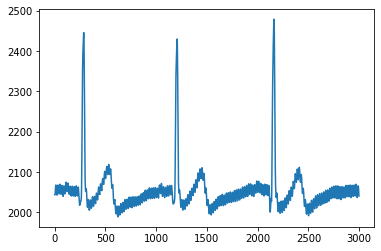

In [46]:
### TODO plot unfiltered signal
plt.plot(signal[0:3000])

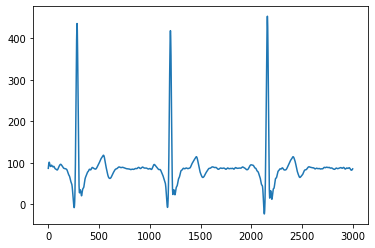

In [47]:
### TODO plot filtered signal
result2=result['filtered'][0:3000]
plt.plot(result2)

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

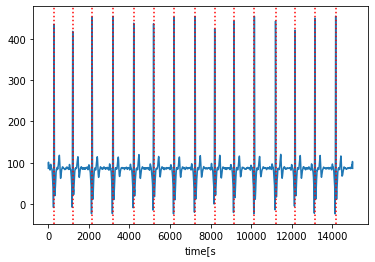

In [48]:
### TODO
result2=biosppy.signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)
new =result["rpeaks"]
plt.plot(result2['filtered'])
for j in new:
  {
      plt.axvline(x=j,color ='r', ls=':')
  }
  plt.xlabel("time[s")

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [49]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


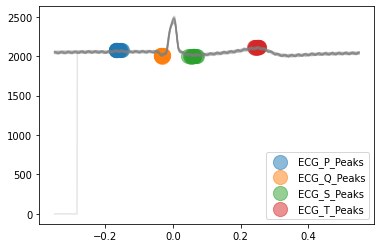

In [50]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
_, waves_peak = nk.ecg_delineate(signal,result2["rpeaks"], 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [51]:
# TODO Does the detection work well?

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [52]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


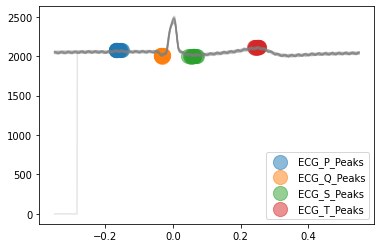

In [53]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
_, waves_peak =nk.ecg_delineate(signal,
                                  result["rpeaks"],
                                  sampling_rate=1000,
                                  method="peak",
                                  show=True,
                                  show_type='peaks'
                                  )

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


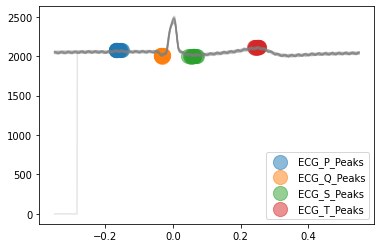

In [54]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak =nk.ecg_delineate(signal,
                                  result2["rpeaks"],
                                  sampling_rate=1000,
                                  method="peak",
                                  show=True,
                                  show_type='peaks'
                                  )

In [55]:
# TODO Which one works the best?

In [56]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#